# General settings and loading of files

In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

from IPython.display import display, Math, Latex
from matplotlib import cm

% matplotlib inline
% load_ext autoreload
% autoreload 2

pd.options.display.max_columns = 40  # Affy csv has 30 fields
pd.options.display.mpl_style = 'default'

mpl.rc('figure', figsize=(13, 7))
mpl.rc('axes', titlesize=17, labelsize=14)
mpl.rc('xtick', labelsize=11)
mpl.rc('ytick', labelsize=11)
mpl.rc('font', family='serif')
mpl.rc('legend', fontsize=15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
%run helpers/data_munging_functions.py
%run helpers/number_helpers.py

In [47]:
%run discriminate_present_vs_missing.py

GALANTER_CSV = '~/tesina/galanter_SNPs.csv'
LAT1_CSV = '~/tesina/affy-LAT1/Axiom_GW_LAT.na35.annot.csv'  # 1.1Gb file!
# Smaller file for testing:
# LAT1_CSV_SMALL = "affy-LAT1/Axiom_GW_LAT.na35.annot.TRUNCATED.csv"

galanter, present, missing = discriminate_present_vs_missing(
    GALANTER_CSV, LAT1_CSV, dumpdir="dumpfiles")

In [48]:
print("{} Galanter AIMs".format(len(galanter)))
print("{} present in LAT".format(len(present)))
print("{} missing in LAT".format(len(missing)))

446 Galanter AIMs
180 present in LAT
266 missing in LAT


In [49]:
HUMAN_GENOME = '/home/juan/tesina/human_genome.txt'
genome = pd.read_csv(HUMAN_GENOME, delimiter="\t")
centromere_info = genome['centromere'].apply(lambda e: pd.Series(e.split(',')).astype(int))
genome = genome.drop('centromere', axis=1)
genome = pd.concat([genome, centromere_info], axis=1)
genome = genome.set_index('ID')
genome.columns = ['length', 'centromere_start', 'centromere_end']
genome = genome.drop(['X', 'Y'])
genome.index = genome.index.rename('chr')
genome.index = genome.index.astype(int)  # This only works after removing X and Y

### Distancias entre los AIMs por cromosoma

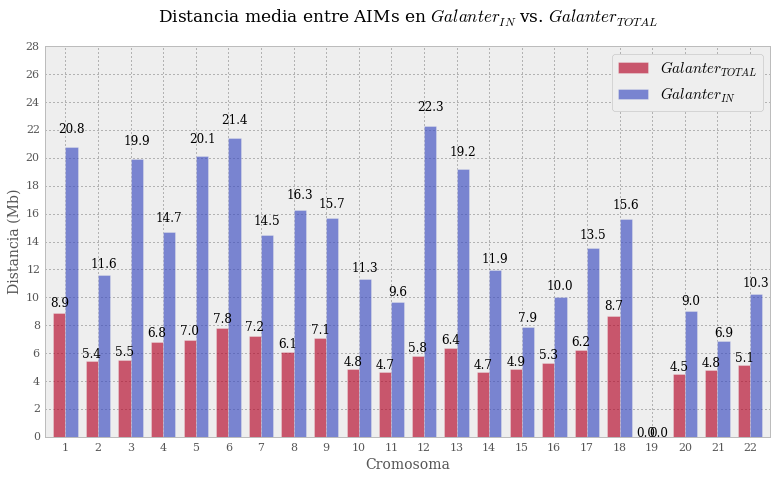

In [50]:
% run SNP_distances_plots.py

galanter_vs_present_mean_distance_plot(galanter, present, genome)
plt.show()

#### Discusión

* Las distancias medias son mucho mayores en $Galanter_{LAT}$ que en $Galanter_{all}$. En casos extremos, llega a más de 20 Mpb promedio entre AIMs, cuando esas distancias promedio no superan los 8 Mpb en el panel original.

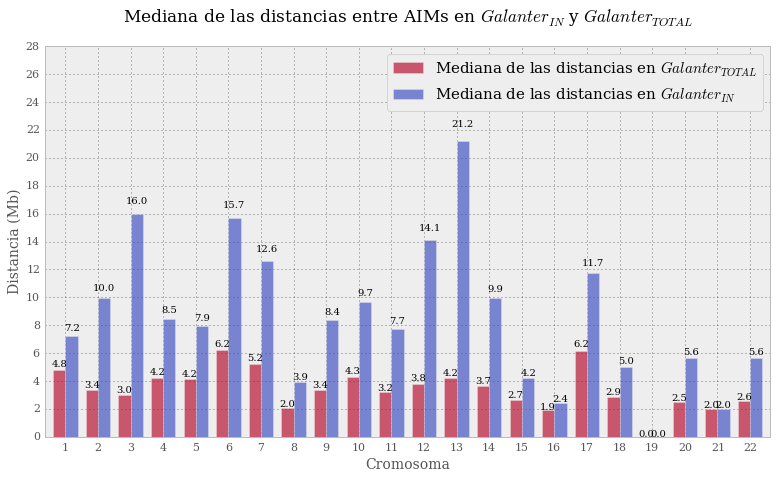

In [51]:
% run data_munging/distances.py

galanter_vs_present_median_distance_plot(galanter, present, genome)
plt.show()

### Discusión

__Nota__: hay un solo AIM en Galanter para el cromosoma 19, de modo que no se grafican distancias.

* En algunos casos extremos, hay hasta 1.4 Mpb (cromosoma 1) y 1 Mpb (cromosoma 8) de distancia entre dos AIMs contiguos.

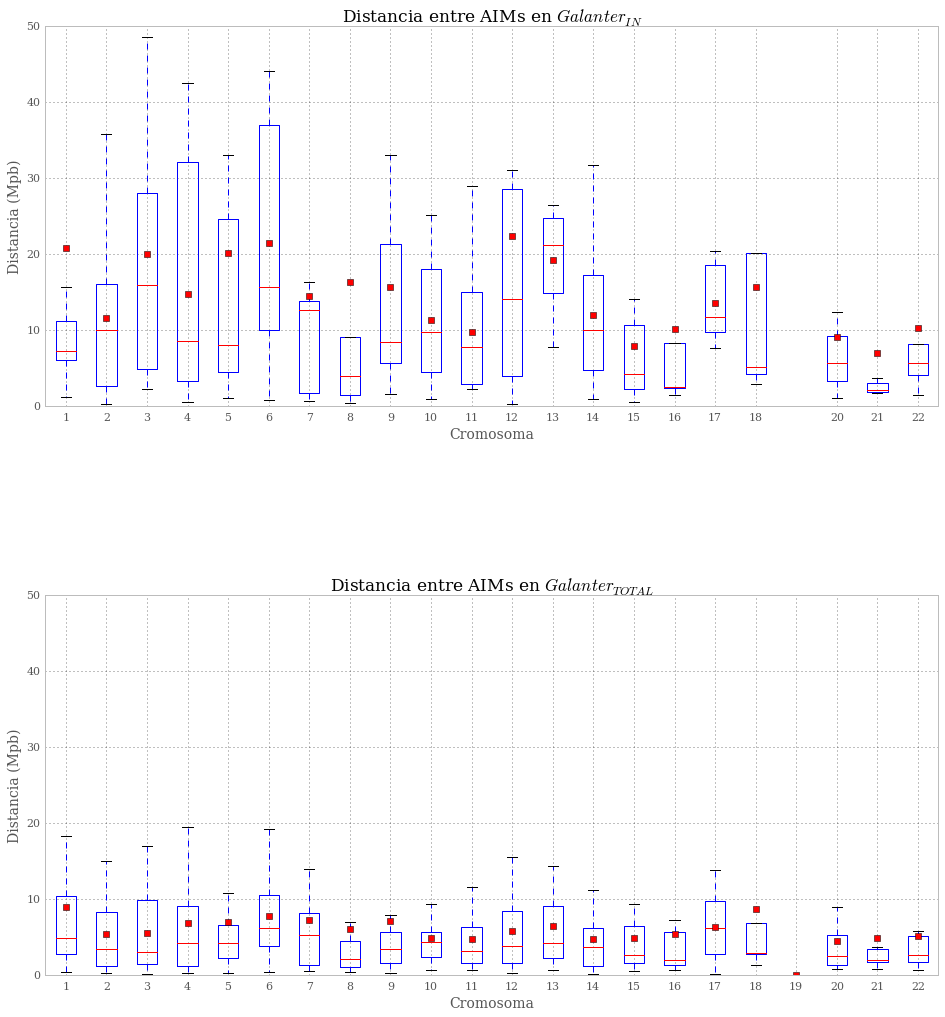

In [52]:
% run data_munging/distances.py

ax1 = plt.subplot(211)
ax1 = distances_boxplot(present, genome, ax=ax1, showfliers=False, showmeans=True,
                        title=r"Distancia entre AIMs en $Galanter_{IN}$")

ax2 = plt.subplot(212, sharey=ax1)
ax2 = distances_boxplot(galanter, genome, ax=ax2, showfliers=False, showmeans=True,
                        title=r"Distancia entre AIMs en $Galanter_{TOTAL}$")

f = ax2.figure
f.set_figheight(17)
f.set_figwidth(16)

plt.show()

**DISCUSIÓN**

- Hay un incremento evidente en las distancias medias y las medianas de distancias entre AIMs al quitar todos los AIMs ausentes en LAT-1. En general se puede observar que en $GALANTER_{IN}$ casi todas las medianas superan las 10 Mb de distancia entre AIMs, mientras que en $GALANTER_{TOTAL}$ todas se mantienen por debajo de ese valor, rondando más bien las 5 Mb.
- Con los outliers (`showfliers=True`) la diferencia se agranda aún más.

In [53]:
% run data_munging/distances.py
% run stats_tests.py

df = snp_distances(galanter, present, genome)
t_test(df['mean_distance_galanter'], df['mean_distance_present'])

t_test(t=-7.6962288203507194, p=2.0496477225364935e-09)

In [54]:
format_numbers(genome)

,length,centromere_start,centromere_end
chr,,,
1,"249,239,465","121,535,434","124,535,434"
2,"243,199,373","92,326,171","95,326,171"
3,"199,411,731","90,504,854","93,504,854"
4,"191,252,270","49,660,117","52,660,117"
5,"180,915,260","46,405,641","49,405,641"
6,"171,115,067","58,830,166","61,830,166"
7,"159,138,663","58,054,331","61,054,331"
8,"146,364,022","43,838,887","46,838,887"
9,"141,213,431","47,367,679","50,367,679"


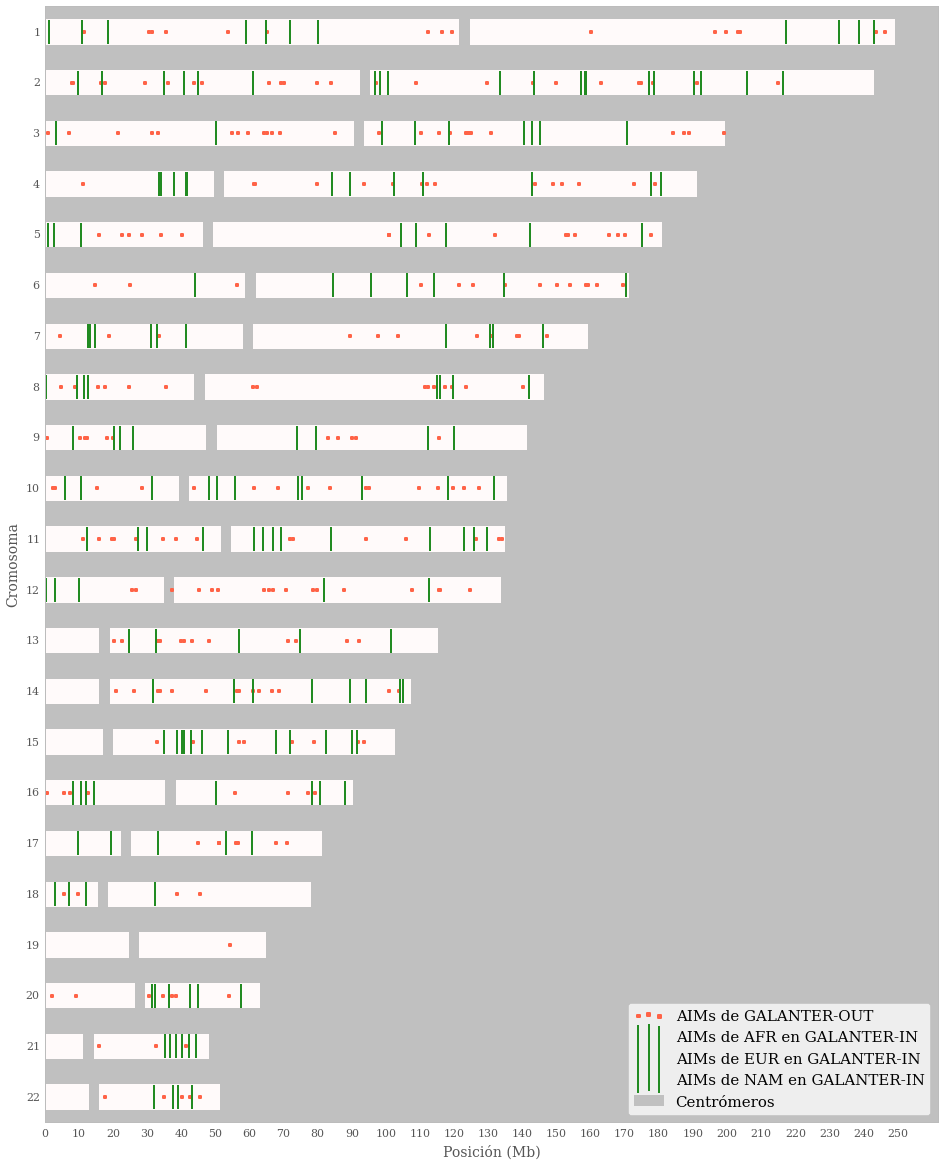

In [55]:
% run chromosomes_with_SNPs_plot.py

from collections import OrderedDict


plot_data = OrderedDict([
    ('AIMs de GALANTER-OUT',
     {'df': missing, 'marker': 's', 's': 7, 'color': 'tomato'}),
        
    ('AIMs de AFR en GALANTER-IN',
     {'df': present[present.population == "AFR"],
      'marker': '|', 'color': 'forestGreen', 's': 600}),
        
    ('AIMs de EUR en GALANTER-IN',
     {'df': present[present.population == "EUR"],
      'marker': '|', 'color': 'forestGreen', 's': 600}),
        
    ('AIMs de NAM en GALANTER-IN',
     {'df': present[present.population == "NAM"],
      'marker': '|', 'color': 'forestGreen', 's': 600}),
])

chromosomes_with_SNPs_plot(genome, plot_data)
plt.show()

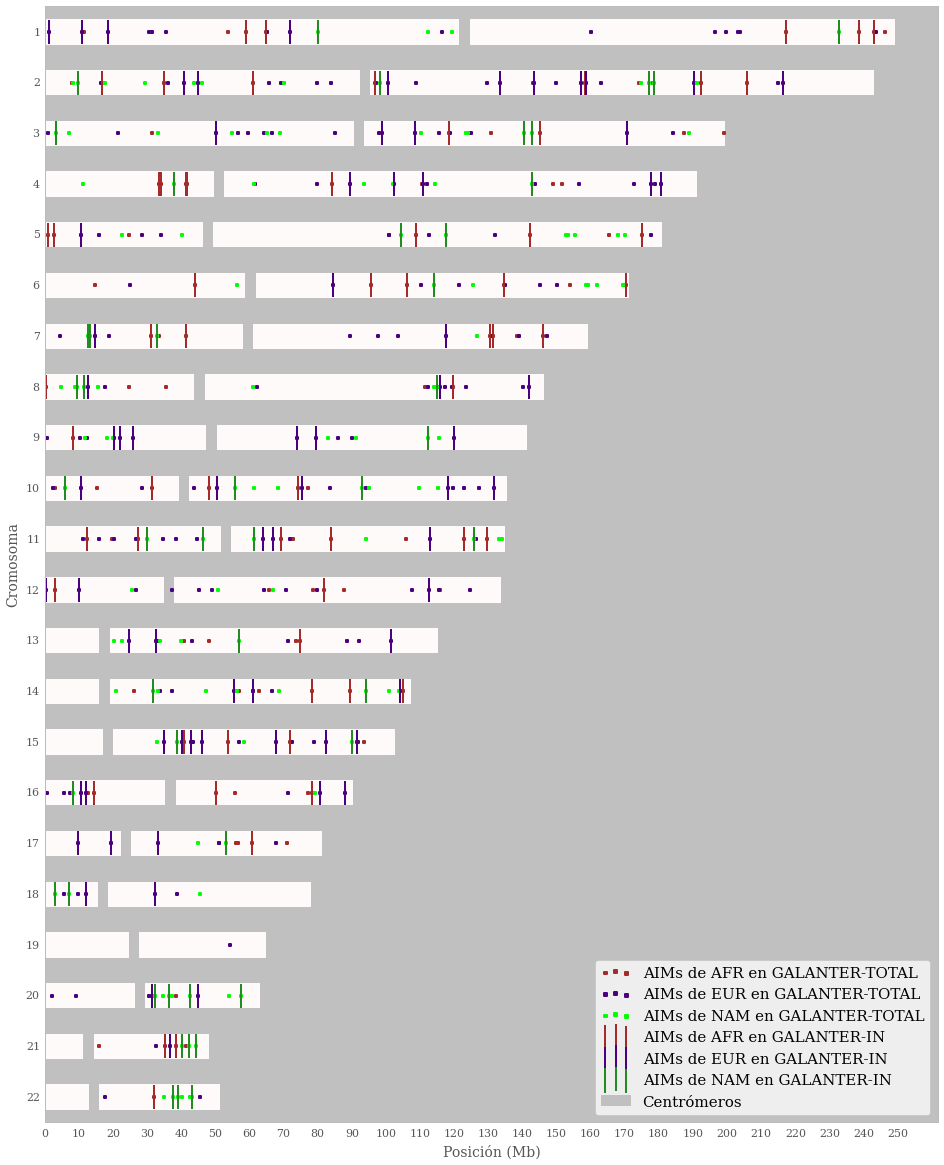

In [56]:
% run chromosomes_with_SNPs_plot.py

from collections import OrderedDict


plot_data = OrderedDict([
        
    ('AIMs de AFR en GALANTER-TOTAL',
     {'df': galanter[galanter.population == "AFR"],
      'marker': 's', 'color': 'brown', 's': 7}),
        
    ('AIMs de EUR en GALANTER-TOTAL',
     {'df': galanter[galanter.population == "EUR"],
      'marker': 's', 'color': 'indigo', 's': 7}),
        
    ('AIMs de NAM en GALANTER-TOTAL',
     {'df': galanter[galanter.population == "NAM"],
      'marker': 's', 'color': 'lime', 's': 7}),
        
    ('AIMs de AFR en GALANTER-IN',
     {'df': present[present.population == "AFR"],
      'marker': '|', 'color': 'brown', 's': 600}),
        
    ('AIMs de EUR en GALANTER-IN',
     {'df': present[present.population == "EUR"],
      'marker': '|', 'color': 'indigo', 's': 600}),
        
    ('AIMs de NAM en GALANTER-IN',
     {'df': present[present.population == "NAM"],
      'marker': '|', 'color': 'forestGreen', 's': 600}),
])

chromosomes_with_SNPs_plot(genome, plot_data)
plt.show()

In [57]:
def pop_counts(df):
    return df.groupby(['chr', 'population']).size().unstack().fillna('>> 0 <<')

df = pd.merge(pop_counts(galanter), pop_counts(present),
         left_index=True, right_index=True,
         suffixes=['_TOTAL', '_IN'])

df.columns = pd.MultiIndex.from_product([['$GALANTER_{TOTAL}$', '$GALANTER_{IN}$'],
                                         ['AFR', 'EUR', 'NAM']])
df

$GALANTER_{TOTAL}$         $GALANTER_{IN}$                  
                   AFR EUR NAM             AFR      EUR      NAM
chr                                                             
1                    8  15   4               5        4        2
2                   11  21  12               7        9        4
3                    7  16  12               2        4        3
4                    8  12   7               5        5        2
5                    8   8   9               5        1        2
6                    7   7   7               5        1        1
7                    7  10   4               5        2        3
8                    5  10   8               2        3        3
9                    1  11   7               1        6        1
10                   6  13   8               3        5        3
11                   9  12   7               6        3        4
12                   6  13   3               2        3  >> 0 <<
13                   4   8   5               1        3        1
14                   7   6   9               3        3        2
15                   4  12   4               3        7        2
16                   6   8   2               3        4        1
17                   5   5   2               1        3        1
18             >> 0 <<   5   3         >> 0 <<        2        2
20                   1   5   7         >> 0 <<        2        4
21                   4   2   3               2        1        3
22                   1   2   6               1  >> 0 <<        3

**DISCUSIÓN**

La reducción de AIMs en GALANTER-IN determina que ciertos cromosomas no tengan ningún AIM de una población determinada:

- En el cromosoma 12 se perdieron los 3 AIMs de NAM.
- En el cromosoma 20 se perdió el único AIM de AFR.
- En el cromosoma 22 se perdieron los 2 AIMs de EUR.

## Diferenciar por población de referencia, present vs galanter

     $Galanter_{IN}$  $Galanter_{TOTAL}$
AFR         0.344444            0.257848
EUR         0.394444            0.452915
NAM         0.261111            0.289238
     $Galanter_{IN}$  $Galanter_{OUT}$
AFR               53                62
EUR              131                71
NAM               82                47


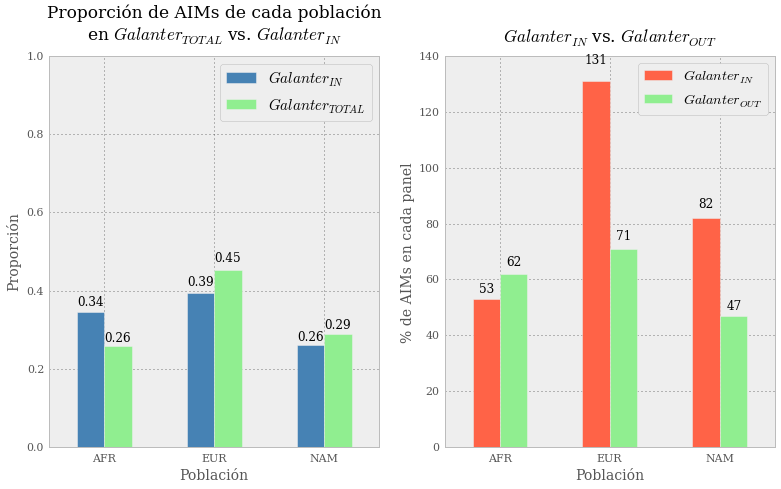

In [58]:
% run superpopulation_ratios_plot.py

superpopulation_ratios_plot(galanter, present)
superpopulation_count_plot(present, missing)

plt.show()

**DISCUSIÓN**

* Los AIMs de Galaner presentes en LAT-1 tienen proporciones poblacionales diferentes a las proporciones del total del panel. En $Galanter_{IN}$
    - la proporción de AFR es .08 mayor
    - la proporción de EUR es .06 menor
    - la proporción de NAM es .03 menor
* Problema: El hecho de que nos quedemos con más AFR en proporción y menos EUR afectará la predición?

# Comparar Galanter con la data de 1000Genomes

In [59]:
# %load /home/juan/tesina/1000genomes/ftp_download_1000_genomes.py

In [60]:
% run extract_SNPs_from_vcf_chromosomes.py

commands = extract_SNPs_from_vcf(galanter.index.values)

# One time only run, to extract the SNPs out of the big chromosome files of 1000genomes:
# run_commands(commands, "/home/juan/tesina/1000genomes")

In [79]:
%run read_samples_data.py

sample_populations_file = "/home/juan/tesina/1000genomes/integrated_call_samples_v3.20130502.ALL.panel"
sample_populations = read_samples_data(sample_populations_file)

In [80]:
%run read_1000genomes_data.py
%run helpers/data_munging_functions.py

import itertools
from glob import glob
from os.path import isfile


vcf_filenames = glob("/home/juan/tesina/1000genomes/chr_*recode*")
df_1000genomes_dumpfile = "dumpfiles/galanter_in_1000G.csv"
samples_genotypes_dumpfile = "dumpfiles/1000G_sample_genotypes.csv"

if not isfile(df_1000genomes_dumpfile):
    records = [_vcf_records(vcf_filename) for vcf_filename in vcf_filenames]
    records = itertools.chain.from_iterable(records)  # Flattens list of lists
    records_as_dictionaries = [_vcf_record_to_dict(r) for r in records]

    # Clean up 1000genomes data
    df_1000genomes = pd.DataFrame(records_as_dictionaries).set_index('ID')
    df_1000genomes = df_1000genomes.dropna(axis=1)
    df_1000genomes = df_1000genomes.drop(['FILTER', 'alleles'], axis=1)
    df_1000genomes = remove_unkown_snp_subtypes(df_1000genomes)
    df_1000genomes = remove_unnecessary_lists_from_df(df_1000genomes)

    # Get sample genotypes
    frames = [pd.DataFrame(dict(genotypes), index=[rs])
              for rs, genotypes in df_1000genomes['sample_genotypes'].iteritems()]
    sample_genotypes = pd.concat(frames).transpose()
    sample_genotypes.to_csv(samples_dumpfile)

    # Remove big unnecessary field after exporting its data to 'samples_genotypes'
    df_1000genomes = df_1000genomes.drop('sample_genotypes', axis=1)
    df_1000genomes.to_csv(df_1000genomes_dumpfile)

df_1000genomes = pd.read_csv(df_1000genomes_dumpfile, index_col='ID')
sample_genotypes = pd.read_csv(samples_genotypes_dumpfile, index_col=0)

In [81]:
population_MAF_dumpfile = "dumpfiles/galanter_MAF_per_population.csv"

if not isfile(population_MAF_dumpfile):
    freq_by_population = defaultdict(dict)

    for rs, genotypes in sample_genotypes.filter(regex='rs').iteritems():
        alt_alleles_count = defaultdict(lambda: 0)
        total_alleles_count = defaultdict(lambda: 0)

        for sample, genotype in genotypes.iteritems():
            population = samples_genotypes.loc[sample].population
            super_population = samples_genotypes.loc[sample].super_population
            alt_alleles_count[population] += genotype
            alt_alleles_count[super_population] += genotype
            total_alleles_count[population] += 2
            total_alleles_count[super_population] += 2

        for population, alt_alleles in alt_alleles_count.items():
            freq_by_population[rs][population] = alt_alleles / total_alleles_count[population]

    freqs = pd.DataFrame(dict(freq_by_population)).transpose()
    mafs = freqs.applymap(lambda freq: min(freq, 1 - freq))
    mafs.to_csv(population_MAF_dumpfile)

maf_by_population = pd.read_csv(population_MAF_dumpfile, index_col=0)

In [65]:
%run population_names.py

dumpfile = "dumpfiles/population_names.csv"
population_names = create_population_names_df(dumpfile)

In [68]:
def whois(pop_code):
    return population_names.loc[pop_code]['Population Description']

whois('ACB')

'African Caribbeans in Barbados'

Ejemplo de la data de subpoblaciones que busco, para rs2585897:

http://browser.1000genomes.org/Homo_sapiens/Variation/Population?db=core;r=13:21398479-21399479;v=rs2585897;vdb=variation;vf=2188197

### Comparar SNPs

In [63]:
print("1000 Genomas:", len(df_1000genomes))
print("Galanter panel:", len(galanter))

1000 Genomas: 442
Galanter panel: 446


**NOTA** sobre los 4 SNPs que faltan
- un SNP tiene mal el cromosoma en Galanter
- en el proceso de leer la data de 1000 genomas estoy dejando afuera tres SNPs, porque tienen más de 2 variantes.

In [64]:
missing_in_1000g = set(galanter.index) - set(df_1000genomes.index)
galanter.loc[missing_in_1000g]

,chr,position,A1,A2,NAM_AF,EUR_AF,AFR_AF,population,LSBL(Fst),LSBL(In)
SNP rsID,,,,,,,,,,
rs2242865,21,15948902,G,T,0.011,0.156,0.932,AFR,0.695,0.422
rs2510719,11,126511001,A,C,0.034,0.574,0.039,EUR,0.341,0.196
rs10071261,5,1066694,T,C,0.107,0.086,0.903,AFR,0.650,0.375
rs12065716,1,116575568,G,C,0.389,0.885,0.136,EUR,0.372,0.207


### Ver qué subpoblaciones se van en $Galanter_{missing}$ y cuáles quedan

In [144]:
present.join(maf_by_population).head()

,chr,position,A1,A2,NAM_AF,EUR_AF,AFR_AF,population,LSBL(Fst),LSBL(In),ACB,AFR,AMR,ASW,BEB,CDX,CEU,CHB,CHS,CLM,...,ESN,EUR,FIN,GBR,GIH,GWD,IBS,ITU,JPT,KHV,LWK,MSL,MXL,PEL,PJL,PUR,SAS,STU,TSI,YRI
SNP rsID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
rs6685064,1,1201155,C,T,0.244,0.930,0.422,EUR,0.372,0.209,0.463542,0.400908,0.384726,0.434426,0.389535,0.268817,0.065657,0.432039,0.376190,0.356383,...,0.409091,0.066600,0.101010,0.076923,0.417476,0.376106,0.056075,0.348039,0.317308,0.363636,0.404040,0.329412,0.437500,0.441176,0.302083,0.235577,0.386503,0.470588,0.037383,0.398148
rs12085319,1,10952065,G,T,0.347,0.817,0.015,EUR,0.351,0.205,0.114583,0.052194,0.458213,0.180328,0.430233,0.467742,0.186869,0.436893,0.495238,0.404255,...,0.025253,0.191849,0.232323,0.131868,0.364078,0.048673,0.186916,0.323529,0.418269,0.393939,0.020202,0.023529,0.492188,0.470588,0.348958,0.427885,0.377301,0.426471,0.214953,0.004630
rs4920310,1,18436476,G,A,0.305,0.819,0.117,EUR,0.355,0.194,0.166667,0.149017,0.462536,0.311475,0.308140,0.413978,0.095960,0.344660,0.423810,0.409574,...,0.070707,0.133201,0.111111,0.115385,0.339806,0.132743,0.163551,0.387255,0.480769,0.500000,0.171717,0.141176,0.453125,0.358824,0.239583,0.370192,0.332311,0.377451,0.172897,0.115741
rs2984915,1,59026283,T,C,0.011,0.090,0.853,AFR,0.636,0.378,0.333333,0.270045,0.145533,0.426230,0.244186,0.241935,0.040404,0.135922,0.204762,0.154255,...,0.252525,0.076541,0.060606,0.076923,0.266990,0.384956,0.079439,0.264706,0.067308,0.151515,0.156566,0.200000,0.062500,0.047059,0.197917,0.269231,0.251534,0.279412,0.121495,0.180556
rs6681578,1,64786174,T,C,0.080,0.233,0.947,AFR,0.616,0.364,0.130208,0.091528,0.210375,0.278689,0.308140,0.301075,0.212121,0.330097,0.271429,0.207447,...,0.045455,0.255467,0.237374,0.252747,0.349515,0.070796,0.299065,0.313725,0.163462,0.333333,0.090909,0.047059,0.164062,0.147059,0.354167,0.293269,0.328221,0.313725,0.271028,0.050926


/usr/local/lib/python3.4/dist-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


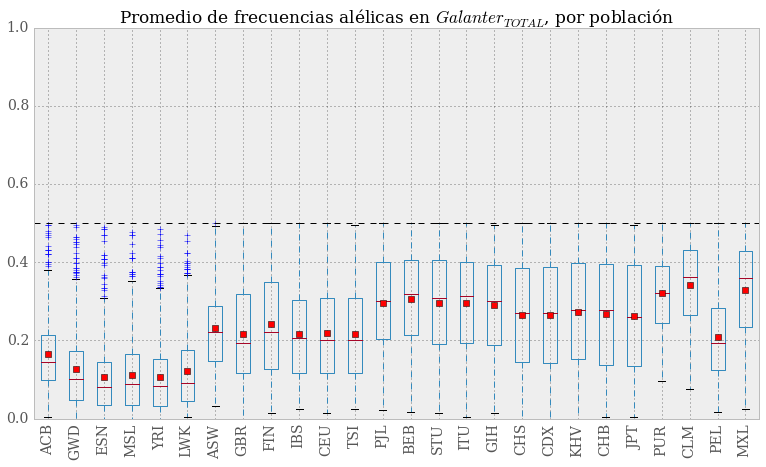

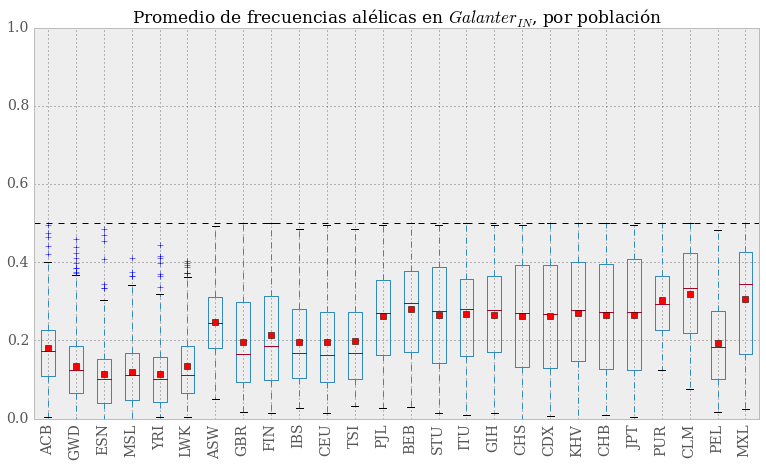

In [184]:
% run analyze_populations_in_galanter.py

populations_to_plot = []

for superpop in ['AFR', 'EUR', 'SAS', 'EAS', 'AMR']:
    pops = sample_populations[sample_populations.super_population == superpop].population.unique()
    populations_to_plot += list(pops)

dfs = {'$Galanter_{IN}$': present,
       '$Galanter_{TOTAL}$': galanter}

for name, df in dfs.items():
    df = df.join(maf_by_population).filter(regex='|'.join(populations_to_plot))
    df = df[populations_to_plot]
    
    ax = boxplot_freqs_by_populations(
        df, populations_to_plot,
        title="Promedio de frecuencias alélicas en {}, por población".format(name),
    )
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

/usr/local/lib/python3.4/dist-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


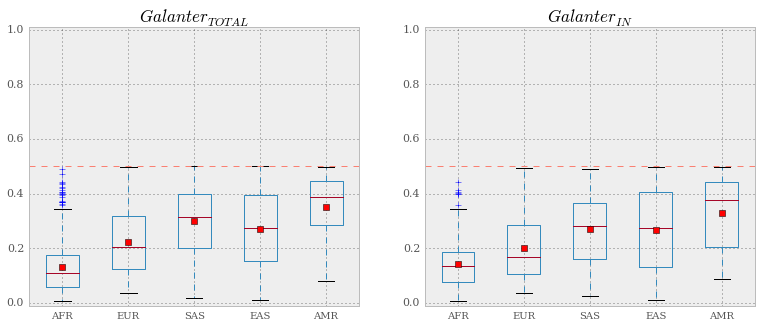

In [178]:
fig, axes = plt.subplots(1, 2, sharey=False)
titles = ("$Galanter_{TOTAL}$", "$Galanter_{IN}$" )

for i, df in enumerate([galanter, present]):
    ax = axes[i]
    df = df.join(maf_by_population).filter(['AFR', 'EUR', 'SAS', 'EAS', 'AMR'])
    df.boxplot(ax=ax, rot=0, showmeans=True)
    ax = axes[i]
    ax.set_title(titles[i])
    ax.set_ylim([-0.01, 1.01])
    ax.axhline(0.5, color='salmon', linestyle='--')

fig.set_figheight(5)
plt.show()

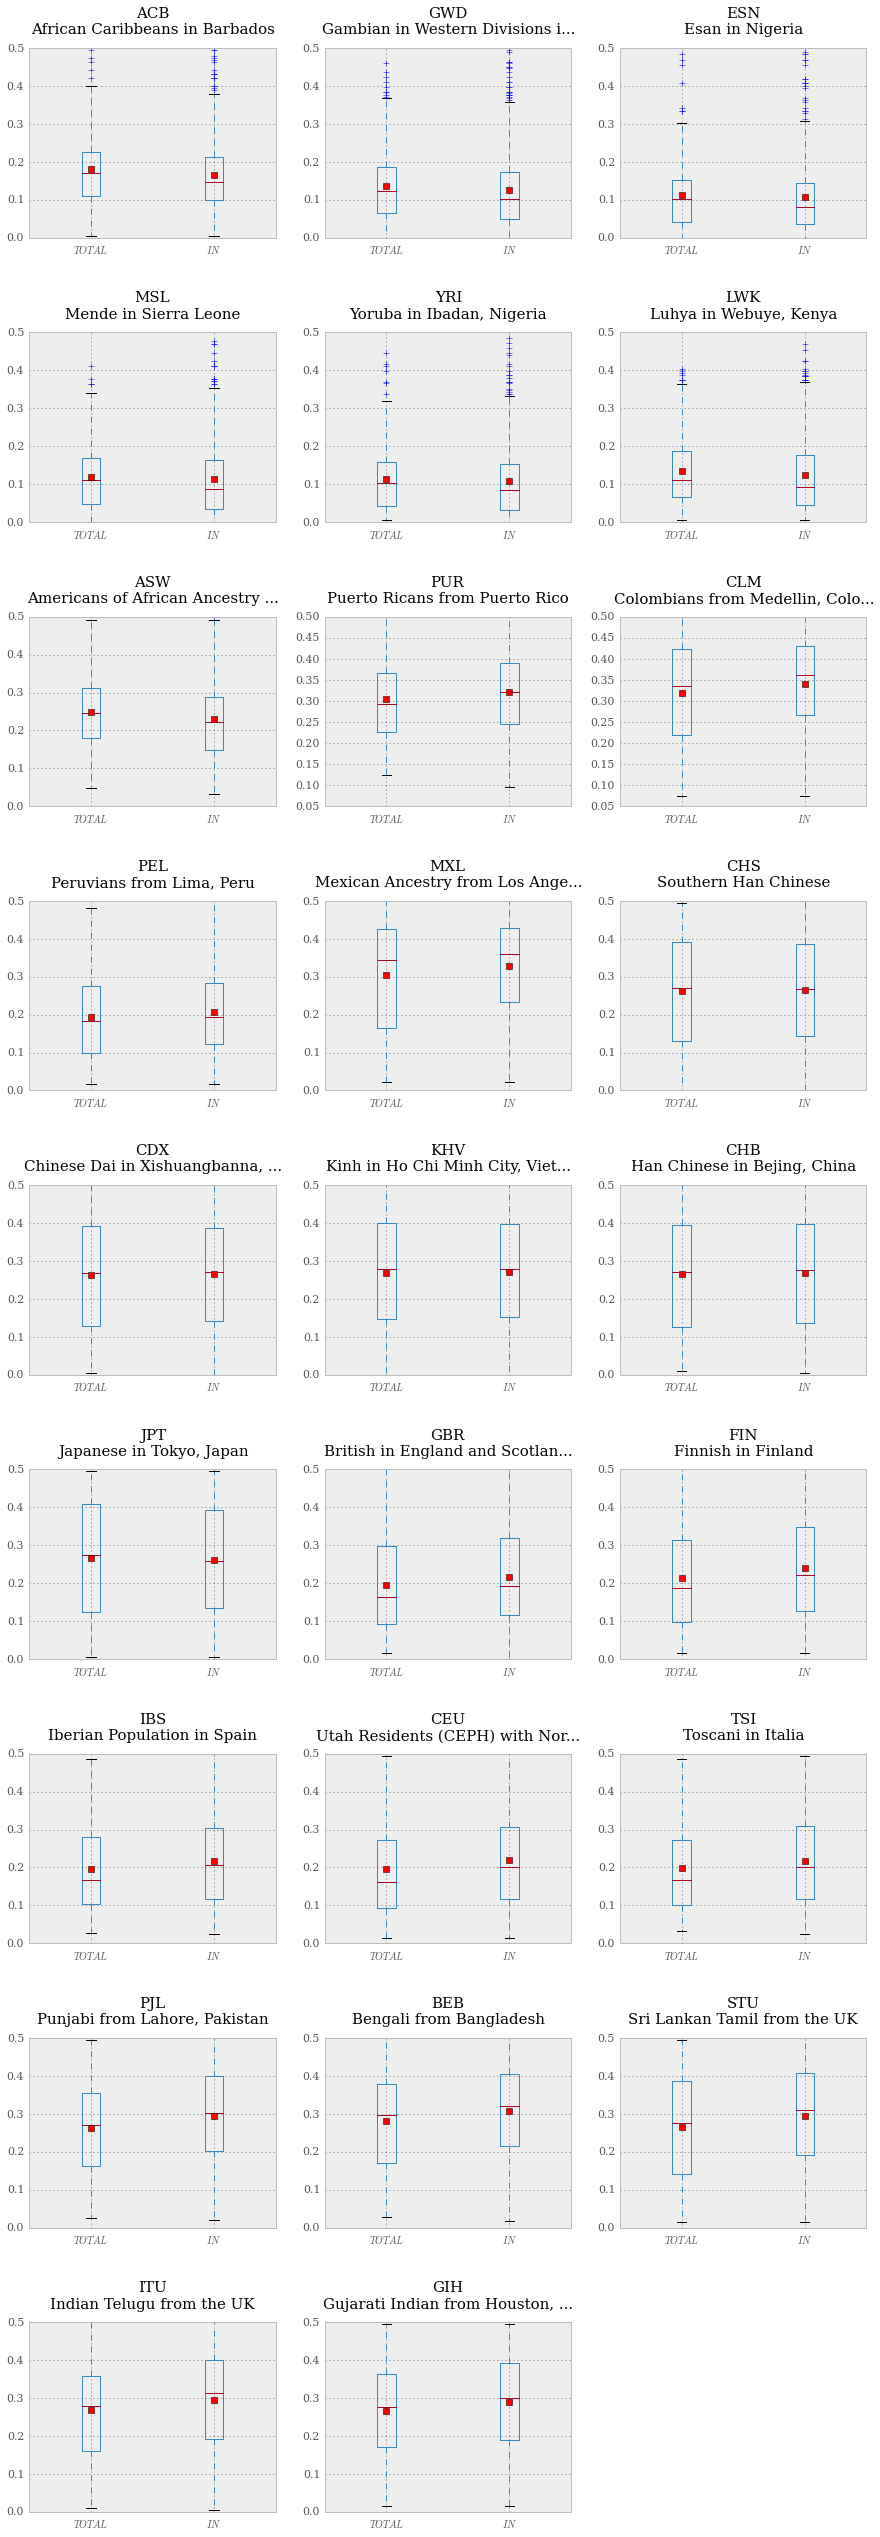

In [190]:
% run helpers/text_helpers.py

# populations_to_plot = set(sample_populations.population.unique()) | \
#                       set(sample_populations.super_population.unique())

populations_to_plot = [p for p in sample_populations.sort('super_population').population.unique()]

get_freqs = lambda df: df.join(maf_by_population)[populations_to_plot]

chart_width = 5
chart_height = 5
fig_rows = 18
fig_cols = 3

fig = plt.figure(figsize=(fig_cols * chart_height, fig_rows * chart_width))

for i, population in enumerate(populations_to_plot):
    df = pd.DataFrame({'$IN$': get_freqs(present)[population],
                       '$TOTAL$': get_freqs(galanter)[population]})
    df.columns = ['$TOTAL$', '$IN$']

    ax = plt.subplot(fig_rows, fig_cols, i+1)
    pop_description = population_names.loc[population]['Population Description']
    ax.set_title(population + "\n" + trunc_text(pop_description, 30), y=1.05, fontsize=15)    
    df.boxplot(ax=ax, showmeans=True, return_type='both')

plt.show()

In [192]:
mean_frequencies = lambda df: maf_by_population.loc[df.index].mean()
std_frequencies = lambda df: maf_by_population.loc[df.index].std()

In [193]:
from collections import OrderedDict

pd.DataFrame(OrderedDict([
    ('$Galanter_{TOTAL}$ mean', mean_frequencies(present)),
    ('$Galanter_{IN}$ mean', mean_frequencies(galanter)),
    ('$Galanter_{TOTAL}$ std', std_frequencies(present)),
    ('$Galanter_{IN}$ std', std_frequencies(galanter))
]))

,$Galanter_{TOTAL}$ mean,$Galanter_{IN}$ mean,$Galanter_{TOTAL}$ std,$Galanter_{IN}$ std
ACB,0.181215,0.166478,0.096727,0.099459
AFR,0.143506,0.133561,0.088909,0.095077
AMR,0.329585,0.351960,0.130475,0.116058
ASW,0.248374,0.230806,0.099467,0.102059
BEB,0.281019,0.306403,0.128408,0.120951
CDX,0.262149,0.265570,0.146044,0.140788
CEU,0.195503,0.219194,0.123740,0.123281
CHB,0.264631,0.267759,0.148695,0.142275
CHS,0.262969,0.265255,0.146424,0.140407
CLM,0.318971,0.341220,0.121574,0.109731


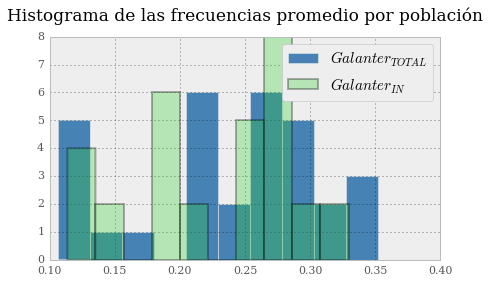

In [194]:
ax = plt.subplot(111)
ax.hist(mean_frequencies(galanter), 10, zorder=0, color='steelblue')
ax.hist(mean_frequencies(present), 10, ec='k', linewidth=2, alpha=.3,
        zorder=1, color='limegreen')
ax.legend(["$Galanter_{TOTAL}$", "$Galanter_{IN}$"], loc='best')
ax.figure.set_figheight(4)
ax.figure.set_figwidth(7)
ax.set_title("Histograma de las frecuencias promedio por población", y=1.05)
plt.show()

In [198]:
import numpy as np
from collections import OrderedDict

df = pd.DataFrame(OrderedDict([
    ('$Galanter_{TOTAL}$', mean_frequencies(galanter)),
    ('$Galanter_{IN}$', mean_frequencies(present)),
    ('freq_diff', mean_frequencies(galanter) - mean_frequencies(present)),
])).sort('$Galanter_{TOTAL}$', ascending=False)

df = df.applymap(lambda n: round(n, 2))
freq_diff = df.join(population_names[['Population Description', 'Super Population Code']]).fillna('')
freq_diff

,$Galanter_{TOTAL}$,$Galanter_{IN}$,freq_diff,Population Description,Super Population Code
AMR,0.35,0.33,0.02,,
CLM,0.34,0.32,0.02,"Colombians from Medellin, Colombia",AMR
MXL,0.33,0.31,0.02,Mexican Ancestry from Los Angeles USA,AMR
PUR,0.32,0.30,0.02,Puerto Ricans from Puerto Rico,AMR
BEB,0.31,0.28,0.03,Bengali from Bangladesh,SAS
SAS,0.30,0.27,0.03,,
ITU,0.30,0.27,0.03,Indian Telugu from the UK,SAS
STU,0.30,0.27,0.03,Sri Lankan Tamil from the UK,SAS
PJL,0.29,0.26,0.03,"Punjabi from Lahore, Pakistan",SAS
GIH,0.29,0.27,0.03,"Gujarati Indian from Houston, Texas",SAS


### Comparar posiciones (Galanter las tiene desplazadas)

In [199]:
positions = galanter[['chr', 'position']].join(df_1000genomes[['CHROM', 'POS']])
positions.columns = ['chr_galanter', 'pos_galanter', 'chr_1000g', 'pos_1000g']
positions['pos_diff'] = positions['pos_galanter'] - positions['pos_1000g']
positions = positions.dropna(axis=0, how='any')
positions = positions.applymap(lambda n: int(n))
format_numbers(positions.head())

,chr_galanter,pos_galanter,chr_1000g,pos_1000g,pos_diff
SNP rsID,,,,,
rs6685064,1,"1,201,155",1,"1,211,292","-10,137"
rs12085319,1,"10,952,065",1,"11,029,478","-77,413"
rs2745285,1,"11,549,445",1,"11,626,858","-77,413"
rs4920310,1,"18,436,476",1,"18,563,889","-127,413"
rs6684063,1,"30,471,927",1,"30,699,340","-227,413"


### Comparación de la "heterocigosidad"

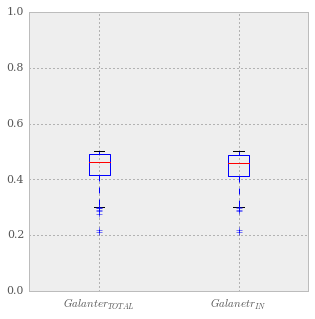

In [200]:
galanter_heter = galanter.join(df_1000genomes, rsuffix='_').heterozygosity
missing_heter = missing.join(df_1000genomes, rsuffix='_').heterozygosity

plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.boxplot([galanter_heter, missing_heter])
ax.set_xticklabels(['$Galanter_{TOTAL}$', '$Galanetr_{IN}$'])
ax.set_ylim([0, 1])
plt.show()

**DISCUSIÓN**

Los datos de 1000Genomes incluyen un valor de heterozigosidad. La distribución de esta métrica parece muy similar en ambos paneles.

## Dot plot de frecuencias por población

In [201]:
galanter

,chr,position,A1,A2,NAM_AF,EUR_AF,AFR_AF,population,LSBL(Fst),LSBL(In)
SNP rsID,,,,,,,,,,
rs6685064,1,1201155,C,T,0.244,0.930,0.422,EUR,0.372,0.209
rs12085319,1,10952065,G,T,0.347,0.817,0.015,EUR,0.351,0.205
rs2745285,1,11549445,G,A,0.108,0.330,0.980,AFR,0.581,0.355
rs4920310,1,18436476,G,A,0.305,0.819,0.117,EUR,0.355,0.194
rs6684063,1,30471927,T,G,0.183,0.841,0.218,EUR,0.411,0.223
rs7515867,1,31497331,C,T,0.062,0.613,0.039,EUR,0.356,0.202
rs11264115,1,35429251,G,A,0.668,0.047,0.617,EUR,0.392,0.223
rs11206160,1,53684400,C,G,0.015,0.200,0.922,AFR,0.633,0.381
rs2984915,1,59026283,T,C,0.011,0.090,0.853,AFR,0.636,0.378


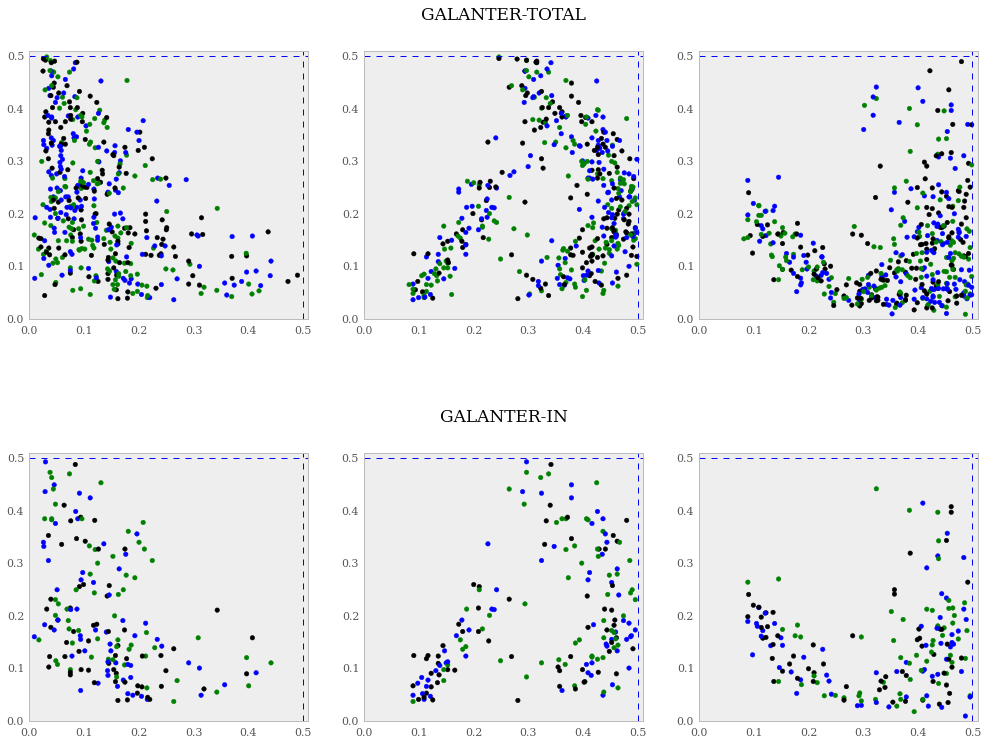

In [209]:
import itertools

height = 6

panels = {'GALANTER-TOTAL': galanter, 'GALANTER-IN': present}
populations = ['AMR', 'AFR', 'EUR']
colors = {'AFR': 'k', 'EUR': 'b', 'AMR': 'g'}
fig = plt.figure(figsize=(17, height * len(panels)))
axes = [plt.subplot(2, 3, n+1) for n in range(6)]

for panel_label, df in panels.items():
    df = df.join(maf_by_population)
    for pop1, pop2 in itertools.combinations(populations, 2):
        ax = axes.pop()
        ax.scatter(df[pop1], df[pop2], color=[colors[p] for p in populations])
        ax.set_ylim([0, .51])
        ax.set_xlim([0, .51])
        if len(axes) in [4, 1]:
            ax.set_title(panel_label, y=1.1)
        ax.grid()
        ax.axvline(0.5, linestyle='--')
        ax.axhline(0.5, linestyle='--')

**DISCUSIÓN**:

- Los SNPs utilizados para inferir ancestría AFR y EUR son 'excluyentes': cuando un SNP tiene alta frecuencia en poblaciones africanas, tiene baja frecuencia en europeos, y viceversa.
- Con respecto a los SNPs utilizados para inferir ancestría NAM, tienen una particularidad: son de alta frecuencia tanto en poblaciones africanas como europeas. Del todo el panel, parecen destacarse por tener altas frecuencias en esas dos poblaciones simultáneamente.
- Con respecto a GALANTER-TOTAL vs GALANTER-IN, las distribuciones parecen mantenerse.